# in The name of God

In [1]:
import numpy as np
import pandas

import matplotlib.pyplot as plt

from numpy import linalg as LA

In [2]:
d = pandas.read_excel('data.xlsx')

In [3]:
X = d.iloc[:,1]
Y = d.iloc[:,2]

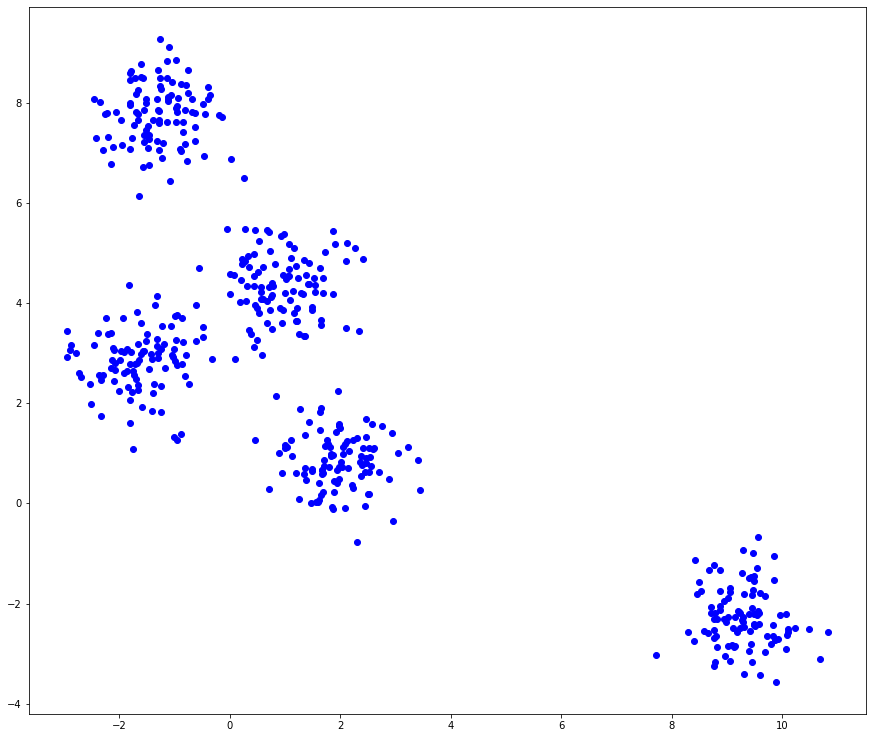

In [174]:
plt.figure(figsize=(15,13))
plt.scatter(X, Y, c ="blue")
plt.show()

Well, it seems like best distance we could work with is Euclidean(L2 norm)

we need to define each point as an object separatly, then doing the job of measures 

In [175]:
points = d.iloc[:,1:3].to_numpy()

In [230]:
#the Algorithm
    #Defining parameters
Nclus = 5                                                    #Number of clusters
Nvar = 2                                                     #Number of variables
a11 = -4; a12 = 12; a21 = -4; a22 = 10;
Npoints = points.shape[0]
################################################################################
means = np.random.random((5,2))                              #means Genesis
means = means@np.diag([a12-a11,a22-a21])
means = means+np.repeat(np.array([[a11, a21]]), 5, 0)



for j in range(10):
    Dist = LA.norm(points, ord = 2, axis = 1, keepdims=True)     #initializing Distance matrix    

    for i in range(Nclus):
        Dist = np.hstack((Dist,LA.norm(points-np.repeat([means[i]], Npoints, 0), ord = 2, axis = 1, keepdims=True))) 
                                                                 #dist matrix explained at the last cell
    Dist = np.delete(Dist,0,1)                                   #drops first column (diastance from zero)
    which = np.argmin(Dist, axis=1)                              #says which point belongs to which cluster


    Clusters = []                                                #initializing Clusters
    for i in range(Nclus):
        Clusters.append(np.array([means[i]]))
    for i in range(Npoints):                                     #putting points in their clusters
        Clusters[which[i]] = np.vstack((Clusters[which[i]], points[i]))
        
    for i in range(Nclus):
        Clusters.append(np.array([means[i]]))

In [231]:
means

array([[ 2.19132309,  5.42571446],
       [11.70134663,  6.63101521],
       [ 1.1433358 ,  9.18679738],
       [ 6.24747313,  8.46416209],
       [ 3.88612688, -2.87307906]])

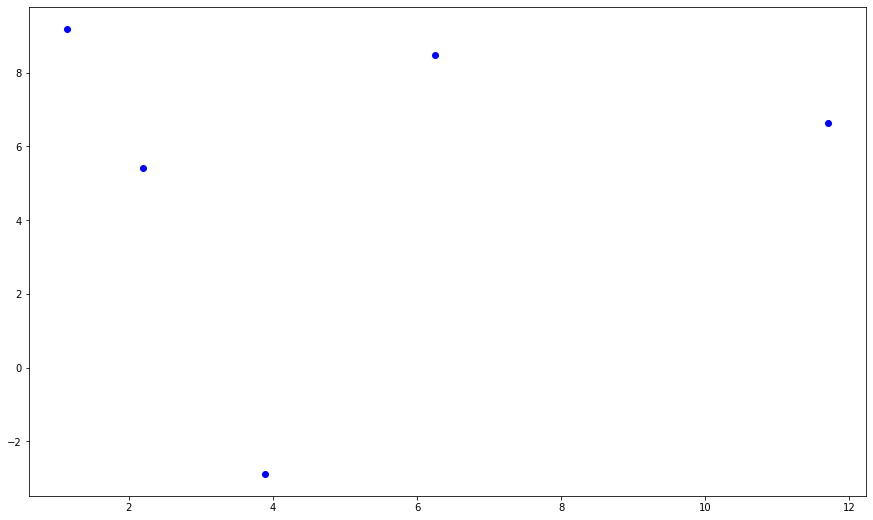

In [232]:
plt.figure(figsize=(15,9))
plt.scatter(means[:,0],means[:,1], c ="blue")
plt.show()

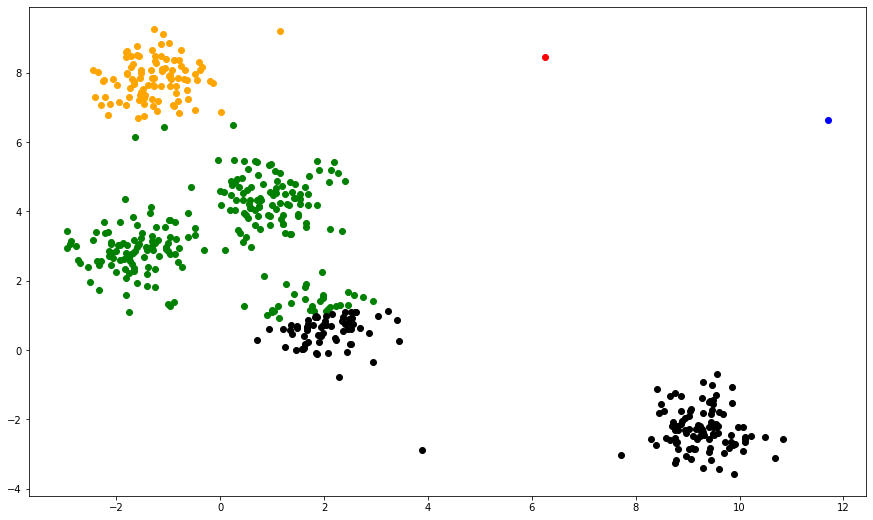

In [233]:
plt.figure(figsize=(15,9))
plt.scatter(Clusters[1][:,0],Clusters[1][:,1], c ="blue")
plt.scatter(Clusters[3][:,0],Clusters[3][:,1], c ="red")
plt.scatter(Clusters[0][:,0],Clusters[0][:,1], c ="green")
plt.scatter(Clusters[2][:,0],Clusters[2][:,1], c ="orange")
plt.scatter(Clusters[4][:,0],Clusters[4][:,1], c ="black")
plt.show()

In [224]:
Clusters[2]

array([[5.25467308, 5.80508068]])

In [225]:
LA.norm(Clusters[0], ord = 1, axis = 0, keepdims=True)/Clusters[0].shape[0]

array([[1.93216962, 0.8671137 ]])

In [227]:
LA.norm(Clusters[2], ord = 1, axis = 0, keepdims=True)/Clusters[2].shape[0]

array([[5.25467308, 5.80508068]])

In [216]:
Clusters[4].shape

(2,)

In [240]:
a = np.arange(2,30,5)

In [241]:
a

array([ 2,  7, 12, 17, 22, 27])

In [236]:
for i in range(2,30,5):
    print(i)

2
7
12
17
22
27


In [ ]:
#Distance matrix has diatance of points from means in columns 1:5 and from zero in column 0
#Clusters is a list contains arrays of each mean point